In [217]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [218]:
control_data = pd.read_csv('control_group.csv', sep=';')
test_data = pd.read_csv('test_group.csv', sep=';')

In [219]:
control_data.head(8)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0


In [220]:
test_data.head(8)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431


## Data Preperation

### The datasets have some errors in column names. Let's change them

In [221]:
control_data.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [222]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent",
                       "Number of Impressions", "Reach", "Website Clicks",
                       "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"
                       ]

In [223]:
test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                     "Purchases"
                    ]

In [224]:
control_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
test_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


### Check the datasets if there are null values:

In [226]:
control_data.isnull().sum().any()

True

In [227]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [228]:
test_data.isnull().sum().any()

False

In [229]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

### The control dataset has null values in a row. We can impute them with the mean value of each column

### There are 7 columns which have null values. We will use Scikit-Learn library to fill them.

In [230]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
control_data[["Number of Impressions", "Reach", "Website Clicks",
                       "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases" ]] = np.round(si.fit_transform(control_data[["Number of Impressions", "Reach",
                         "Website Clicks", "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases" ]]),2)

In [231]:
control_data.isnull().sum().any()

False

### Creating a new dataset by merging both datasets.

In [232]:
ab_data = control_data.merge(test_data, how='outer').sort_values(['Date'])

C:\Users\Mert97\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1113: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation



In [233]:
ab_data = ab_data.reset_index(drop=True)

In [234]:
ab_data

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.00,56930.00,7016.00,2290.00,2159.00,1819.0,618.00
1,Test Campaign,1.08.2019,3008,39550.00,35820.00,3038.00,1946.00,1069.00,894.0,255.00
2,Test Campaign,10.08.2019,2790,95054.00,79632.00,8125.00,2312.00,1804.00,424.0,275.00
3,Control Campaign,10.08.2019,2149,117624.00,91257.00,2277.00,2475.00,1984.00,1629.0,734.00
4,Test Campaign,11.08.2019,2420,83633.00,71286.00,3750.00,2893.00,2617.00,1075.0,668.00
5,Control Campaign,11.08.2019,2490,115247.00,95843.00,8137.00,2941.00,2486.00,1887.0,475.00
6,Test Campaign,12.08.2019,2831,124591.00,10598.00,8264.00,2081.00,1992.00,1382.0,709.00
7,Control Campaign,12.08.2019,2319,116639.00,100189.00,2993.00,1397.00,1147.00,1439.0,794.00
8,Test Campaign,13.08.2019,1972,65827.00,49531.00,7568.00,2213.00,2058.00,1391.0,812.00
9,Control Campaign,13.08.2019,2697,82847.00,68214.00,6554.00,2390.00,1975.00,1794.0,766.00


### Checking if the dataset has an equal number of samples about both campaigns

In [235]:
ab_data['Campaign Name'].value_counts()

Test Campaign       30
Control Campaign    30
Name: Campaign Name, dtype: int64

## A/B Testing to Find the Best Marketing Strategy

### Analyzing the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns

In [236]:
figure = px.scatter(data_frame = ab_data,
                   x='Number of Impressions',
                    y='Amount Spent',
                    size='Amount Spent',
                    color= 'Campaign Name',
                    trendline='ols'  #  Ordinary Least Squares regression 
                   )
figure.show()

### The control campaign resulted in more impressions according to the amount spent on both campaigns. 
### Now let’s have a look at the number of searches performed on the website from both campaigns:

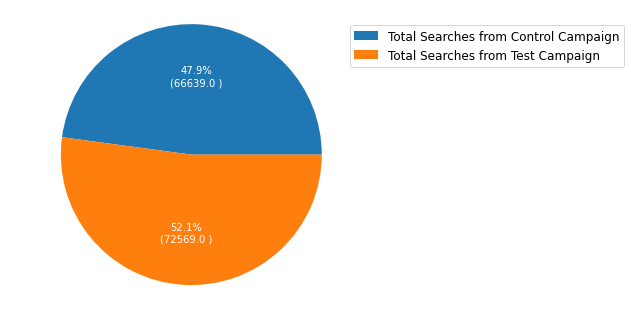

In [237]:
labels = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]
values = [sum(control_data['Searches Received']),
         sum(test_data['Searches Received'])]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:.1f} )".format(pct, absolute)

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values),textprops=dict(color="w"),radius=1.5)
plt.legend(bbox_to_anchor=(1.2,1),loc="center left",fontsize=12)
plt.show()

### The test campaign resulted in more searches on the website.

### Now let’s have a look at the number of website clicks from both campaigns

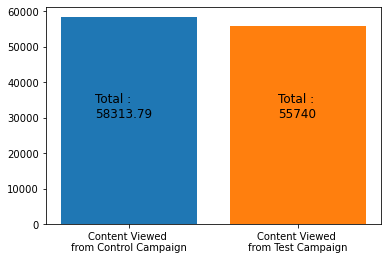

In [238]:
plt.bar("Content Viewed \nfrom Control Campaign",sum(control_data["Content Viewed"]))
plt.bar("Content Viewed \nfrom Test Campaign",sum(test_data["Content Viewed"]))
3#lt.ylabel("Website Clicks",fontsize=14)
plt.text(-0.2,30000,"Total : "+'\n' + str(sum(control_data["Content Viewed"])),fontsize=12)
plt.text(0.88,30000,"Total : " +'\n' + str(sum(test_data["Content Viewed"])),fontsize=12)
plt.show()

### The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

### Let’s have a look at the number of products added to the cart from both campaigns

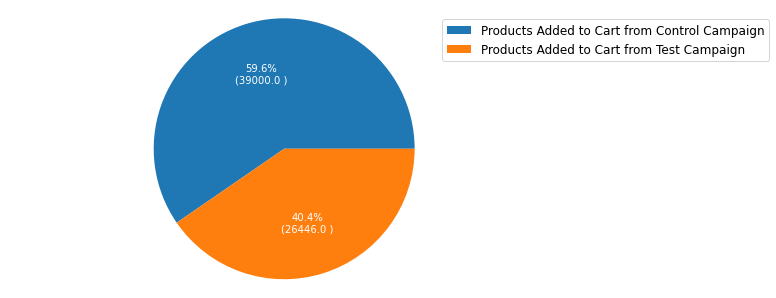

In [239]:
labels = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
values = [sum(control_data['Added to Cart']),
         sum(test_data['Added to Cart'])]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:.1f} )".format(pct, absolute)

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values),textprops=dict(color="w"),radius=1.5)
plt.legend(bbox_to_anchor=(1.2,1),loc="center left",fontsize=12)
plt.show()

### Despite low website clicks, more products were added to the cart from the control campaign.

###  Let’s have a look at the amount spent on both campaigns

In [240]:
labels = ["Amount of Spent in Control Campaign", 
         "Amount of Spent in Test Campaign"]
values = [sum(control_data['Amount Spent']),
         sum(test_data['Amount Spent'])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Control vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent',textinfo='percent+value',textfont_size=16,
                 marker=dict(line=dict(color='black', width=2)))

### The amount spent on the test campaign is higher than the control campaign.
### However as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

### Let’s have a look at the purchases made by both campaigns

In [241]:
labels = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
values = [sum(control_data['Purchases']),
         sum(test_data['Purchases'])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Control vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent',textinfo='percent+value',textfont_size=16,
                 marker=dict(line=dict(color='black', width=2)))

### There’s only a difference of around 0.2% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here!

### Let’s analyze some metrics to find which ad campaign converts more

### First look at the relationship between the number of website clicks and content viewed from both campaigns

In [245]:
fig = px.scatter(data_frame = ab_data,
                x='Content Viewed',
                y='Website Clicks',
                size='Website Clicks',
                color='Campaign Name',
                trendline='ols')
fig.show()

### The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

### The relationship between the amount of content viewed and the number of products added to the cart from both campaigns:

In [248]:
fig = px.scatter(data_frame=ab_data,
                x='Added to Cart',
                y='Content Viewed',
                size='Added to Cart',
                color='Campaign Name',
                trendline='ols')
fig.show()

### The engagement from Content Viewed is higher in the control campaign.Again, the control campaign wins!

### The relationship between the number of products added to the cart and the number of sales from both campaigns:

In [251]:
fig = px.scatter(data_frame=ab_data,
                x='Purchases',
                y='Added to Cart',
                size='Purchases',
                color='Campaign Name',
                trendline='ols')
fig.show()

### Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

## Conclusion

### The A/B tests showed that the control campaign was more successful in terms of sales and engagement from visitors. Visitors viewed more products in the control campaign, leading to more products in carts and sales. However, the test campaign had a higher conversion rate for products in carts. While the test campaign generated more sales based on products viewed and added to carts, the control campaign resulted in higher overall sales. Hence, the test campaign is suitable for targeting specific products to specific audiences, while the control campaign is better for promoting multiple products to a broader audience.